<a href="https://colab.research.google.com/github/koh-hongQ/CME193/blob/main/Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CME 193 - Lecture 2

This class we will cover
1. Basics of creating classes and objects
2. Basics of NumPy
3. Some plotting

## Quick Recap of lists using Bank Account example

In [1]:
debits = []
credits = []

In [2]:
def add_to_debits(value):
    global debits
    debits += [value]

In [3]:
def add_to_credits(value):
    global credits
    credits += [value]

In [4]:
add_to_credits(1000)
add_to_debits(10)
add_to_debits(15)
add_to_debits(100)

In [5]:
def total_value():
    global debits
    global credits
    total =0
    for val in debits:
        total-=val
    for val in credits:
        total+=val
    return total

In [6]:
total_value()

875

## Lets use Classes and Objects

In [7]:
class Account:
    pass

## Exercise 1

### Add more functionality to the account class

1. Add a check before debits to ensure funds are available

2. Add a `transfer` function to your account class, which transfers money form one account to another.It should add to the debits of one account and to the credits of the other.

## Example: Rational Numbers

Let's continue with our example of rational numbers (fractions), that is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers. Let's make it support addition using the formula:
$$ \frac{p_1}{q_1} + \frac{p_2}{q_2} = \frac{p_1 q_2 + p_2 q_1}{q_1 q_2}$$

In [8]:
import math

class Rational:
    def __init__(self, p, q=1):

        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')

        g = math.gcd(p, q)

        self.p = p // g
        self.q = q // g

    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)

    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)

    # method to add two rationals - interprets self + other
    def __add__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)

    def __radd__(self, other): # interprets other + self
        return self + other # addition commutes!


In [9]:
r = Rational(3)
print(r)

3 / 1


In [10]:
r = Rational(3, 2)
print('Integer adding:')
print('right add')
print(r + 4)
print(float(r + 4))

Integer adding:
right add
11 / 2
5.5


In [11]:
print('left add')
print(4 + r)
print(float(4 + r))

left add
11 / 2
5.5


# Exercise 2

### Add more operations to `Rational`
You can read about the available operations that you can overload [here](https://docs.python.org/3.7/reference/datamodel.html#emulating-numeric-types)

Add the following operations to the `Rational` class:
* `*` - use `__mul__`
* `/` - use `__truediv__`
* `-` - use `__sub__`

You only need to define these operations between two `Rational` types - use an `if isinstance(other, Rational):` block.

Make a few examples to convince yourself that this works.



In [12]:
class Rational:
    def __init__(self, p, q=1):

        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')

        g = math.gcd(p, q)

        self.p = p // g
        self.q = q // g

    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)

    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)

    # method to add two rationals - interprets self + other
    def __add__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if it's an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)

    def __radd__(self, other): # interprets other + self
        return self + other # addition commutes!

    # subtraction
    def __sub__(self, other):
        raise NotImplementedError('Subtraction not implemented yet')

    # multiplication
    def __mul__(self, other):
        raise NotImplementedError('Subtraction not implemented yet')

    # division
    def __truediv__(self, other):
        raise NotImplementedError('Division not implemented yet')


In [ ]:
# Write some examples to test your code

# Exercise 3
## Square root of rationals using the Babylonian method

Implement the [Babylonian Method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method) for computing the square root of a number $S$.

In [13]:
def babylonian(S, num_iters=5):
    raise NotImplementedError('Not implemented yet')

In [14]:
math.sqrt(24)

4.898979485566356

# NumPy
This is a good segue into NumPy. Python provides only a handful of numeric types: ints, longs, floats, and complex numbers. We just declared a class that implements rational numbers. NumPy implements one very useful numeric type: multidimensional arrays.

In [16]:
# Quick note on importing
import math
math.sin(5)

-0.9589242746631385

In [17]:
import math as m
m.sin(5)

-0.9589242746631385

In [18]:
import numpy as np

In [19]:
x = np.array([[0, 1], [1, 5]])
x

array([[0, 1],
       [1, 5]])

In [20]:
y = np.array([[4, 0], [0, 4]])
y

array([[4, 0],
       [0, 4]])

In [21]:
x + y

array([[4, 1],
       [1, 9]])

In [22]:
x ** 2

array([[ 0,  1],
       [ 1, 25]])

In [23]:
x @ y  # Matrix multiplication

array([[ 0,  4],
       [ 4, 20]])

In [24]:
np.sum(x)

np.int64(7)

### Why NumpPy?

In [25]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z=0
for i in range(10000):
    z += x[i]*y[i]

3.73 ms ± 63.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = np.dot(x,y)

200 µs ± 5.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## NumPy functions for creating arrays

In [27]:
X=np.zeros((10,10))
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
X.shape

(10, 10)

In [29]:
Y=np.ones((10,10))
Y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [30]:
2*Y+3

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [31]:
R=np.random.rand(5,5)
R

array([[0.58802949, 0.22469415, 0.42215788, 0.63687618, 0.35649424],
       [0.67090505, 0.76299827, 0.78160104, 0.8031056 , 0.02537686],
       [0.09943684, 0.26765836, 0.60798388, 0.04550098, 0.47559453],
       [0.42638285, 0.17296266, 0.68669278, 0.92574425, 0.64542414],
       [0.96251519, 0.62231865, 0.23988231, 0.33011466, 0.75482808]])

In [32]:
Rn = np.random.randn(5,5)
Rn

array([[ 0.0656119 , -0.36349699, -1.88454083, -1.87965946,  1.29458869],
       [ 0.04768869, -0.18549463, -0.82589606, -1.1074978 , -1.20490945],
       [-1.28582228,  1.11066971,  0.15270664,  1.37837619,  1.62571917],
       [ 0.28838169,  1.1197423 , -0.76466062,  0.41686448,  0.89310035],
       [ 1.28745478,  0.69901636,  0.60052219,  2.10812435,  0.85344855]])

In [33]:
np.arange(1,100,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [34]:
np.linspace(0,5,10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [35]:
X = np.arange(0,100)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [36]:
X.reshape((10,10))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

# Exercise 4

## Numpy Array construction

1. 5 by 10 array with all elements random between 50 and 100.
2. All numbers between 50 and 51, separated by 0.01

# Plotting

We will see some functions to do some quick plotting, we will come back to this library later.

In [37]:
import matplotlib.pyplot as plt

In [38]:
x = np.linspace(-5,5,100)
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [39]:
y = x*x
y

array([2.50000000e+01, 2.40001020e+01, 2.30206101e+01, 2.20615243e+01,
       2.11228446e+01, 2.02045710e+01, 1.93067034e+01, 1.84292419e+01,
       1.75721865e+01, 1.67355372e+01, 1.59192939e+01, 1.51234568e+01,
       1.43480257e+01, 1.35930007e+01, 1.28583818e+01, 1.21441690e+01,
       1.14503622e+01, 1.07769615e+01, 1.01239669e+01, 9.49137843e+00,
       8.87919600e+00, 8.28741965e+00, 7.71604938e+00, 7.16508520e+00,
       6.63452709e+00, 6.12437506e+00, 5.63462912e+00, 5.16528926e+00,
       4.71635547e+00, 4.28782777e+00, 3.87970615e+00, 3.49199061e+00,
       3.12468115e+00, 2.77777778e+00, 2.45128048e+00, 2.14518927e+00,
       1.85950413e+00, 1.59422508e+00, 1.34935211e+00, 1.12488522e+00,
       9.20824406e-01, 7.37169677e-01, 5.73921028e-01, 4.31078461e-01,
       3.08641975e-01, 2.06611570e-01, 1.24987246e-01, 6.37690032e-02,
       2.29568411e-02, 2.55076013e-03, 2.55076013e-03, 2.29568411e-02,
       6.37690032e-02, 1.24987246e-01, 2.06611570e-01, 3.08641975e-01,
      

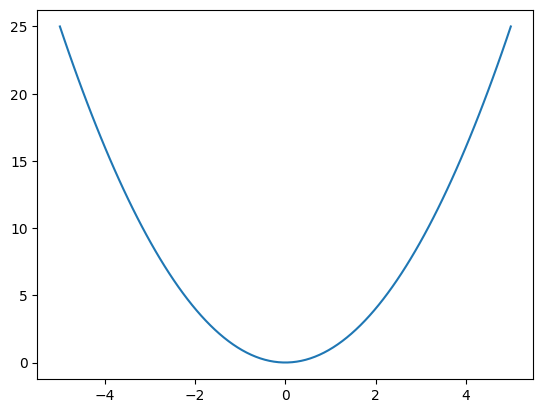

In [40]:
plt.plot(x,y)

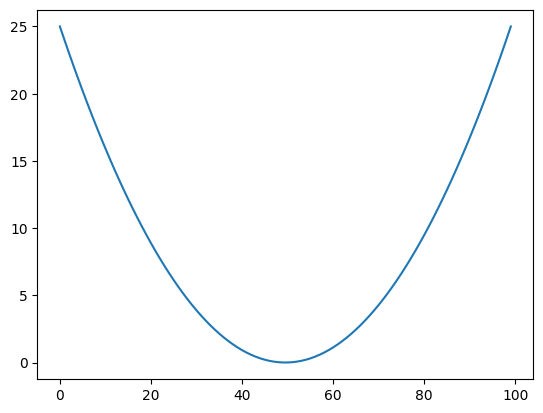

In [41]:
plt.plot(y)

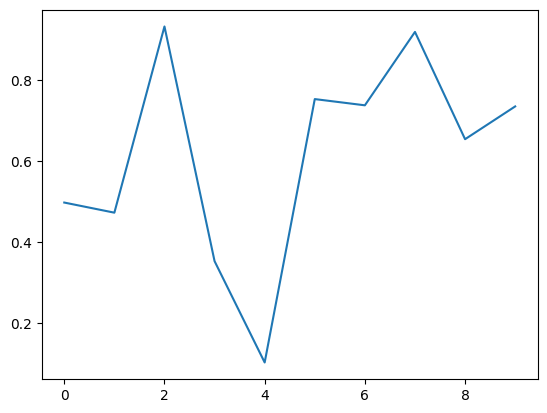

In [42]:
plt.plot(np.random.rand(10))

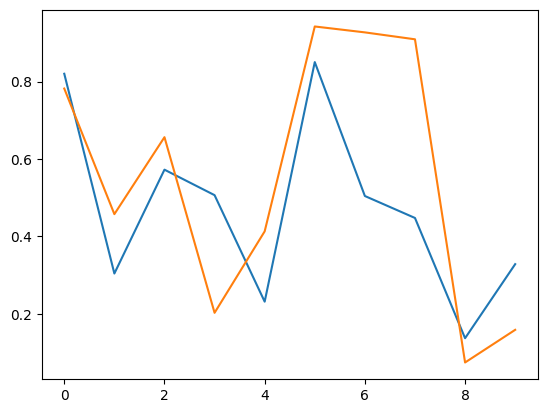

In [43]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))

Text(0.5, 1.0, 'Title')

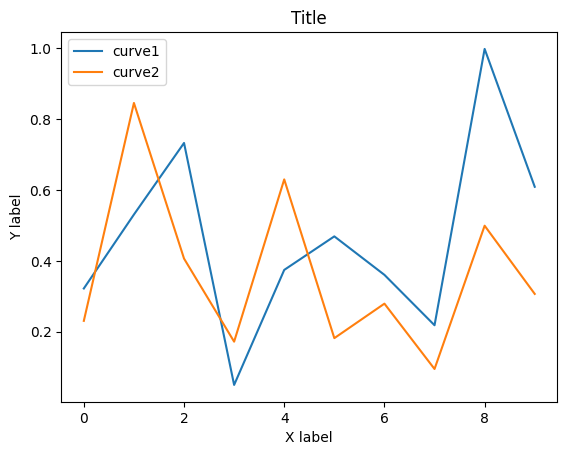

In [44]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.legend(["curve1","curve2"])
plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("Title")